# Estimate Sobol indices

In this example we are going to estimate the Sobol' indices from X/Y samples.

In [96]:
from __future__ import print_function
import openturns as ot

In [97]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
formula = ['sin(_pi*X1)+7*sin(X2)*sin(_pi*X2)+' + \
           '1.1*((_pi*X3)*(_pi*X2))*sin(_pi*X1)']
input_names = ['X1', 'X2', 'X3']
model = ot.SymbolicFunction(input_names, formula)
distribution = ot.ComposedDistribution([ot.Uniform(-1.0, 1.0)] * 3, \
                                        ot.IndependentCopula(3))
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, True).generate()
outputDesign = model(inputDesign)

In [98]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
first_order = sensitivityAnalysis.getFirstOrderIndices()
print(first_order)

[0.0673722,0.19643,0.0348151]


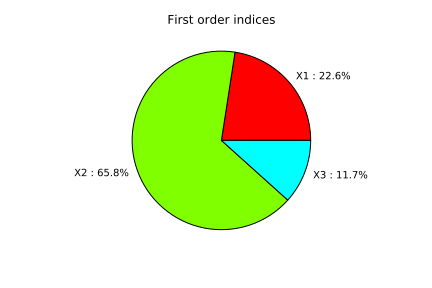

In [99]:
# Draw indices (normalized)
sensitivityAnalysis.DrawImportanceFactors(first_order, input_names, 'First order indices')